In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix

In [34]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [35]:
df = pd.read_csv('../../data/test/H160.csv', parse_dates=['utc_time'])
df.columns = ['time','batch','phase', 'heat_time', 'weight', 'head_temp', 'head_pressure', 'vac_temp']

In [36]:
df = df[df['phase'].str.contains ('DRYING|DISCHRG|HEATING') == True]
# df = df[df['phase'].str.contains ('DRYING') == True]


In [37]:
df["time"] = df["time"].dt.tz_localize(None)
df['date'] = df['time'].dt.date
df['day'] = df['time'].dt.dayofweek


In [38]:
df.replace({'??????': None}, inplace=True)
df.replace({'????????': None}, inplace=True)
df.dropna(inplace=True)

In [39]:
df['head_temp'] = df.head_temp.astype(float)
df['weight'] = df.weight.astype(float)
df['head_pressure'] = df.head_pressure.astype(float)
df['heat_time'] = df.heat_time.astype(float)
df['vac_temp'] = df.vac_temp.astype(float)
df['batch'] = df.batch.astype(float)
df['phase'] = df.phase.astype('category')

In [40]:
n = 30  # number of points to be checked before and after

# Find local peaks
df['max_temp'] = 0
df['max_temp'] = df.iloc[argrelextrema(df.head_temp.values, np.greater_equal, order=n)]['head_temp']
df.tail(220)

,time,batch,phase,heat_time,weight,head_temp,head_pressure,vac_temp,date,day,max_temp
42852,2022-05-03 04:47:18,157260.0,DRYING,141.3,2945.6,60.00,498.8,21.557,2022-05-03,1,NaN
42853,2022-05-03 04:48:18,157260.0,DRYING,142.3,2941.9,60.00,450.4,21.447,2022-05-03,1,NaN
42854,2022-05-03 04:49:18,157260.0,DRYING,143.3,2941.4,60.00,451.8,21.369,2022-05-03,1,NaN
42855,2022-05-03 04:50:18,157260.0,DRYING,144.2,2941.3,60.00,453.8,21.304,2022-05-03,1,NaN
42856,2022-05-03 04:51:18,157260.0,DRYING,145.2,2943.6,60.00,458.6,21.247,2022-05-03,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43067,2022-05-03 08:22:18,157260.0,DISCHRG,180.0,388.9,38.73,726.2,27.089,2022-05-03,1,NaN
43068,2022-05-03 08:23:18,157260.0,DISCHRG,180.0,306.5,38.00,726.9,27.159,2022-05-03,1,NaN
43069,2022-05-03 08:24:18,157260.0,DISCHRG,180.0,288.6,38.00,727.6,27.230,2022-05-03,1,NaN
43070,2022-05-03 08:25:18,157261.0,DISCHRG,180.0,289.6,37.73,727.7,27.284,2022-05-03,1,NaN


In [41]:
df['ready'] = 0
delta_t = 2
for i in range (1, len(df['ready']-1)):
    if df.max_temp.values[i] > 0:
        local_max = df.max_temp.values[i]
        current = df.batch.values[i]
        while df['batch'].values[i] == current and i < len(df['ready']-1):
            if local_max - df.head_temp.values[i] > delta_t:
                df.ready.values[i] = 1
            else:
                df.ready.values[i] = 2
            i += 1
            
                
df = df.drop(['max_temp'], axis=1)
df = df[df['phase'].str.contains ('DRYING|HEATING') == True]

In [42]:
df['head_pressure_20'] = df['head_pressure'].shift(-20)
df['head_temp_20'] = df['head_temp'].shift(-20)
df['weight_20'] = df['weight'].shift(-20)
df['heat_time_20'] = df['heat_time'].shift(-20)
df['vac_temp_20'] = df['vac_temp'].shift(-20)

df['head_pressure_30'] = df['head_pressure'].shift(-30)
df['head_temp_30'] = df['head_temp'].shift(-30)
df['weight_30'] = df['weight'].shift(-30)
df['heat_time_30'] = df['heat_time'].shift(-30)
df['vac_temp_30'] = df['vac_temp'].shift(-30)

df['head_pressure_35'] = df['head_pressure'].shift(-35)
df['head_temp_35'] = df['head_temp'].shift(-35)
df['weight_35'] = df['weight'].shift(-35)
df['heat_time_35'] = df['heat_time'].shift(-35)
df['vac_temp_35'] = df['vac_temp'].shift(-35)

df['head_pressure_40'] = df['head_pressure'].shift(-40)
df['head_temp_40'] = df['head_temp'].shift(-40)
df['weight_40'] = df['weight'].shift(-40)
df['heat_time_40'] = df['heat_time'].shift(-40)
df['vac_temp_40'] = df['vac_temp'].shift(-40)
df.dropna(inplace=True)
df


,time,batch,phase,heat_time,weight,head_temp,head_pressure,vac_temp,date,day,...,head_pressure_35,head_temp_35,weight_35,heat_time_35,vac_temp_35,head_pressure_40,head_temp_40,weight_40,heat_time_40,vac_temp_40
0,2022-04-03 10:35:18,157165.0,DRYING,66.2,2049.0,69.00,349.7,17.308,2022-04-03,6,...,319.0,71.00,2033.6,66.2,17.153,334.0,71.00,2026.2,66.2,17.113
1,2022-04-03 10:36:18,157165.0,DRYING,66.2,2051.2,69.00,324.6,17.259,2022-04-03,6,...,322.6,70.55,2030.7,66.2,17.154,344.2,71.00,2026.9,66.2,17.156
2,2022-04-03 10:37:18,157165.0,DRYING,66.2,2048.8,69.00,325.5,17.245,2022-04-03,6,...,326.0,70.45,2029.7,66.2,17.130,354.0,71.00,2029.2,66.2,17.191
3,2022-04-03 10:38:18,157165.0,DRYING,66.2,2048.2,69.00,329.8,17.200,2022-04-03,6,...,330.1,71.00,2029.8,66.2,17.127,367.7,71.00,2034.0,66.2,17.214
4,2022-04-03 10:39:18,157165.0,DRYING,66.2,2049.2,69.00,330.8,17.138,2022-04-03,6,...,332.5,71.00,2024.5,66.2,17.126,378.5,71.00,2037.6,66.2,17.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,2022-05-03 07:26:18,157260.0,DRYING,180.0,2952.3,69.29,395.0,21.745,2022-05-03,1,...,501.9,73.78,2942.4,180.0,21.309,727.0,56.72,2788.8,180.0,21.110
43012,2022-05-03 07:27:18,157260.0,DRYING,180.0,2950.6,70.00,395.4,21.733,2022-05-03,1,...,704.5,66.61,2956.7,180.0,21.439,727.0,55.45,2766.7,180.0,22.251
43013,2022-05-03 07:28:18,157260.0,DRYING,180.0,2953.1,70.29,410.9,21.751,2022-05-03,1,...,723.0,62.17,2947.2,180.0,21.536,727.0,53.73,2757.0,180.0,23.294
43014,2022-05-03 07:29:18,157260.0,DRYING,180.0,2954.3,71.00,437.3,21.710,2022-05-03,1,...,727.0,59.45,2924.6,180.0,21.542,727.0,52.73,2753.6,180.0,23.877


In [43]:
# def load_query(path):
#     with open(path) as file:
#         return file.read()

In [44]:
# query = load_query('queries/daily_cycles.sql')
# daily_cycles = pysqldf(query)

In [45]:
# daily_cycles.sample(4)

In [46]:
# daily_cycles.describe()

In [47]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [48]:
# plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
# fig, ax = plt.subplots()
# sns.lineplot(data=daily_cycles.tail(50), x='DATE', y='num_cycles')
# plt.grid(linestyle='-', linewidth=0.3)
# ax.tick_params(axis='x', rotation=90)

In [49]:
# query = load_query('queries/weekly_cycles.sql')
# weekly_cycles = pysqldf(query)

In [50]:
# weekly_cycles.tail()

In [51]:
# plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
# fig, ax = plt.subplots()
# sns.lineplot(data=weekly_cycles.tail(50), x='week', y='num_cycles')
# plt.grid(linestyle='-', linewidth=0.3)
# ax.tick_params(axis='x', rotation=90)

In [52]:
df = df[df['ready'] < 2]

In [53]:
features = [
            # 'heat_time', 'weight', 'head_temp', 'head_pressure', 'vac_temp',
            # 'heat_time_20', 'weight_20', 'head_temp_20', 'head_pressure_20', 'vac_temp_20',
            # 'heat_time_30', 'weight_30', 'head_temp_30', 'head_pressure_30', 'vac_temp_30',
            'heat_time_35', 'weight_35', 'head_temp_35', 'head_pressure_35', 'vac_temp_35',
            'heat_time_40', 'weight_40', 'head_temp_40', 'head_pressure_40', 'vac_temp_40'
            ]
label = ['ready']
train_df = df.head(int(df.shape[0]*.75))
test_df = df.tail(int(df.shape[0]*0.25))


X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]


In [54]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            # gamma=0.25,
                            max_depth=8,
                            seed=42)

In [55]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_train, y_train),(X_test, y_test)])

[0]	validation_0-aucpr:0.99651	validation_1-aucpr:0.93771
[1]	validation_0-aucpr:0.99887	validation_1-aucpr:0.93926
[2]	validation_0-aucpr:0.99913	validation_1-aucpr:0.94278
[3]	validation_0-aucpr:0.99926	validation_1-aucpr:0.94275
[4]	validation_0-aucpr:0.99977	validation_1-aucpr:0.93650
[5]	validation_0-aucpr:0.99983	validation_1-aucpr:0.94108
[6]	validation_0-aucpr:0.99991	validation_1-aucpr:0.94336


C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[7]	validation_0-aucpr:0.99995	validation_1-aucpr:0.94718
[8]	validation_0-aucpr:0.99997	validation_1-aucpr:0.95325
[9]	validation_0-aucpr:0.99999	validation_1-aucpr:0.95536
[10]	validation_0-aucpr:0.99999	validation_1-aucpr:0.95355
[11]	validation_0-aucpr:0.99999	validation_1-aucpr:0.95470
[12]	validation_0-aucpr:0.99999	validation_1-aucpr:0.95552
[13]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95430
[14]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95497
[15]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95748
[16]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95645
[17]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95915
[18]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95796
[19]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95867
[20]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95862
[21]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95680
[22]	validation_0-aucpr:1.00000	validation_1-aucpr:0.96046
[23]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95895


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:>

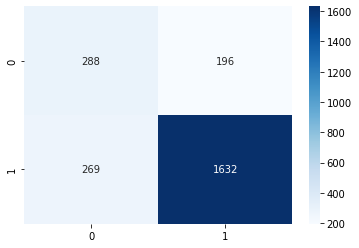

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = clf_xgb.predict_proba(X_test)[:,1]
thr=0.7
sns.heatmap(confusion_matrix(y_test,pred>thr),annot=True,fmt='', cmap='Blues')

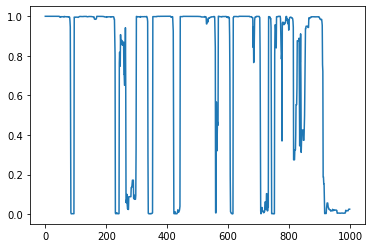

In [57]:
plt.plot(pd.Series(pred[-1000:]))

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


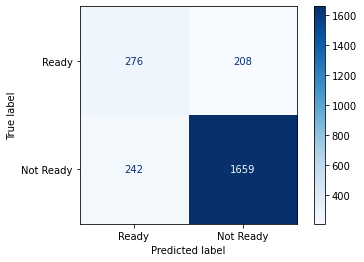

In [58]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      cmap='Blues',
                      display_labels=['Ready', 'Not Ready'])

In [59]:
bst = clf_xgb.get_booster()
for importance_type in ('weight','gain', 'cover', 'total_gain','total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

weight:  {'heat_time_35': 213.0, 'weight_35': 280.0, 'head_temp_35': 156.0, 'head_pressure_35': 107.0, 'vac_temp_35': 162.0, 'heat_time_40': 93.0, 'weight_40': 126.0, 'head_temp_40': 68.0, 'head_pressure_40': 166.0, 'vac_temp_40': 139.0}
gain:  {'heat_time_35': 24.94470977783203, 'weight_35': 7.817847728729248, 'head_temp_35': 13.803007125854492, 'head_pressure_35': 4.852035999298096, 'vac_temp_35': 7.746304512023926, 'heat_time_40': 16.600141525268555, 'weight_40': 4.489468574523926, 'head_temp_40': 3.3621103763580322, 'head_pressure_40': 4.2697272300720215, 'vac_temp_40': 2.765622138977051}
cover:  {'heat_time_35': 107.87401580810547, 'weight_35': 48.038333892822266, 'head_temp_35': 81.74525451660156, 'head_pressure_35': 33.28761672973633, 'vac_temp_35': 31.898380279541016, 'heat_time_40': 67.73614501953125, 'weight_40': 34.36109924316406, 'head_temp_40': 23.701126098632812, 'head_pressure_40': 47.55554962158203, 'vac_temp_40': 20.668001174926758}
total_gain:  {'heat_time_35': 5313.2

In [60]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=clf_xgb.predict_proba(X_test)[:,1]>0.5, normalize=True)

C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8113207547169812

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=clf_xgb.predict_proba(X_test)[:,1]>0.5, target_names=['ready', 'not yet']))

              precision    recall  f1-score   support

       ready       0.53      0.57      0.55       484
     not yet       0.89      0.87      0.88      1901

    accuracy                           0.81      2385
   macro avg       0.71      0.72      0.72      2385
weighted avg       0.82      0.81      0.81      2385



C:\Users\lbushman\.virtualenvs\drayers-ZSJxV8Z-\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [62]:
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH